In [20]:
import nltk
import nltk.corpus.reader as r
from nltk import word_tokenize
from nltk import FreqDist
import string
import pandas as pd
import matplotlib

import sys
# sys.setdefaultencoding() does not exist, here!
reload(sys)  # Reload does the trick!
sys.setdefaultencoding('UTF8')

%matplotlib inline

In [21]:
tweets = pd.read_csv("https://raw.githubusercontent.com/xkong100/Data620_Team3/master/final_Project/620trumptweets.csv")

In [22]:
tweets.head()

,timestamp,sn,text,EST
0,2017-07-17 00:46:31,Financeolizer,Trump lashes out as new poll finds record low ...,2017-07-16 19:46:31
1,2017-07-17 00:46:30,MrScavellz,Trump still hasn't acknowledged McCain having ...,2017-07-16 19:46:30
2,2017-07-17 00:46:19,dp42049,RT @ShirlsAdams: @20thgrader @20committee @lul...,2017-07-16 19:46:19
3,2017-07-17 00:46:10,KingOfTerror201,Younus AlGohar's Solution to #Terrorism https:...,2017-07-16 19:46:10
4,2017-07-17 00:46:00,SubiksaS,"RT @Timesolizer: #Russia, others intervened in...",2017-07-16 19:46:00


In [23]:
tweets_text = tweets['text'].tolist()

In [24]:
tweets_text

['Trump lashes out as new poll finds record low approval rating #President #DonaldTrump https://t.co/VUxIgwCvI3 https://t.co/rCBt3O9HL7',
 "Trump still hasn't acknowledged McCain having surgery but he has found plenty of time to tweet about himself &amp; insult the media #DonaldTrump",
 'RT @ShirlsAdams: @20thgrader @20committee @lulu_lemew My gawd, #DonaldTrump was talking about Russia when he wrote this tweet in 2013!',
 "Younus AlGohar's Solution to #Terrorism https://t.co/lE1dwkin0E #Daesh #ISIS ##BokoHaram #Taliban #AlNusra #AlQaeda #DonaldTrump",
 'RT @Timesolizer: #Russia, others intervened in US #presidentialelection: #DonaldTrump - #TimesofIndia... https://t.co/T2yeifV36J https://t.\xe2\x80\xa6',
 "Reebok schools us (I'm belong polite).  #donaldtrump #covfefe #macron #reebok #youreinsuchgoodshape https://t.co/8QrfCXHBzQ",
 '#DonaldTrump te desaf\xc3\xada a vencerlo en su nuevo juego par Android. Descargalo Gratis https://t.co/6b6fxysW9G https://t.co/bHr2SKQ22n',
 'Est\xc3\xa1s

In [33]:

[" " if ch in string.punctuation else ch for ch in tweets_text]

tweets_text =  " ".join("".join([" " if ch in string.punctuation else ch for ch in tweets_text]).split())
tweets_text = tweets_text.lower()
words_raw = nltk.word_tokenize(tweets_text)

#remove 'https', 't' and 'co' and punctuation not caught in the abouve split, because people use punctuation in 
#weird places on twitter.  
words = []
for item in words_raw:
    if item not in ['https', 't', 'co' , '#', ':', '&', '@']:
        words.append(item.encode('ascii',errors='ignore') )
    
    


In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
words

['trump',
 'lashes',
 'out',
 'as',
 'new',
 'poll',
 'finds',
 'record',
 'low',
 'approval',
 'rating',
 'president',
 'donaldtrump',
 'vuxigwcvi3',
 'rcbt3o9hl7trump',
 'still',
 'hasn',
 'acknowledged',
 'mccain',
 'having',
 'surgery',
 'but',
 'he',
 'has',
 'found',
 'plenty',
 'of',
 'time',
 'to',
 'tweet',
 'about',
 'himself',
 'amp',
 'insult',
 'the',
 'media',
 'donaldtrumprt',
 'shirlsadams',
 '20thgrader',
 '20committee',
 'lulu',
 'lemew',
 'my',
 'gawd',
 'donaldtrump',
 'was',
 'talking',
 'about',
 'russia',
 'when',
 'he',
 'wrote',
 'this',
 'tweet',
 'in',
 '2013',
 'younus',
 'algohar',
 's',
 'solution',
 'to',
 'terrorism',
 'le1dwkin0e',
 'daesh',
 'isis',
 'bokoharam',
 'taliban',
 'alnusra',
 'alqaeda',
 'donaldtrumprt',
 'timesolizer',
 'russia',
 'others',
 'intervened',
 'in',
 'us',
 'presidentialelection',
 'donaldtrump',
 'timesofindia',
 't2yeifv36j',
 'reebok',
 'schools',
 'us',
 'i',
 'm',
 'belong',
 'polite',
 'donaldtrump',
 'covfefe',
 'macron

**How many unique words are there in the corpus?**

In [36]:
total_words = len(words)
total_words

5869

**Taking the most common words, how many unique words represent half of the total words in the corpus?**

In [37]:

freq_dist = FreqDist(words)
len(freq_dist)

unique_words_lt_50 = 0 
total_words_seen = 0 
for v in sorted(freq_dist.values(), reverse=True):
    unique_words_lt_50 = unique_words_lt_50+ 1
    total_words_seen = total_words_seen + v
 
    if total_words_seen > total_words * .5:
        break
unique_words_lt_50

47

**Identify the 200 highest frequency words in this corpus.**

In [38]:
freq_dist.most_common(200)

[('donaldtrump', 285),
 ('the', 172),
 ('taliban', 142),
 ('isis', 142),
 ('to', 112),
 ('rafu007', 108),
 ('of', 102),
 ('bokoharam', 97),
 ('salafism', 90),
 ('wahhabism', 90),
 ('deobandi', 86),
 ('is', 86),
 ('donaldtrumprt', 85),
 ('trump', 81),
 ('alqaeda', 58),
 ('a', 54),
 ('saudiarabia', 52),
 ('alnusra', 52),
 ('alshabab', 51),
 ('in', 51),
 ('muslims', 48),
 ('mischief', 47),
 ('pseudo', 47),
 ('islam', 45),
 ('mikepence', 44),
 ('s', 44),
 ('introduction', 41),
 ('his', 41),
 ('usa', 40),
 ('an', 40),
 ('quran', 39),
 ('what', 35),
 ('yn7y6yevig', 34),
 ('you', 34),
 ('and', 33),
 ('ahrad9f7hd', 33),
 ('bxyluj0axy', 32),
 ('saurt', 31),
 ('donaldtrumpjr', 29),
 ('on', 29),
 ('trumptrain', 29),
 ('americafirst', 27),
 ('for', 27),
 ('by', 27),
 ('trumprussia', 27),
 ('ccot', 25),
 ('amp', 22),
 ('great', 21),
 ('rt', 21),
 ('realdonaldtrump', 20),
 ('as', 20),
 ('not', 19),
 ('why', 19),
 ('amjoyshow', 19),
 ('donald', 19),
 ('it', 18),
 ('thetrumppuppet', 18),
 ('another', 

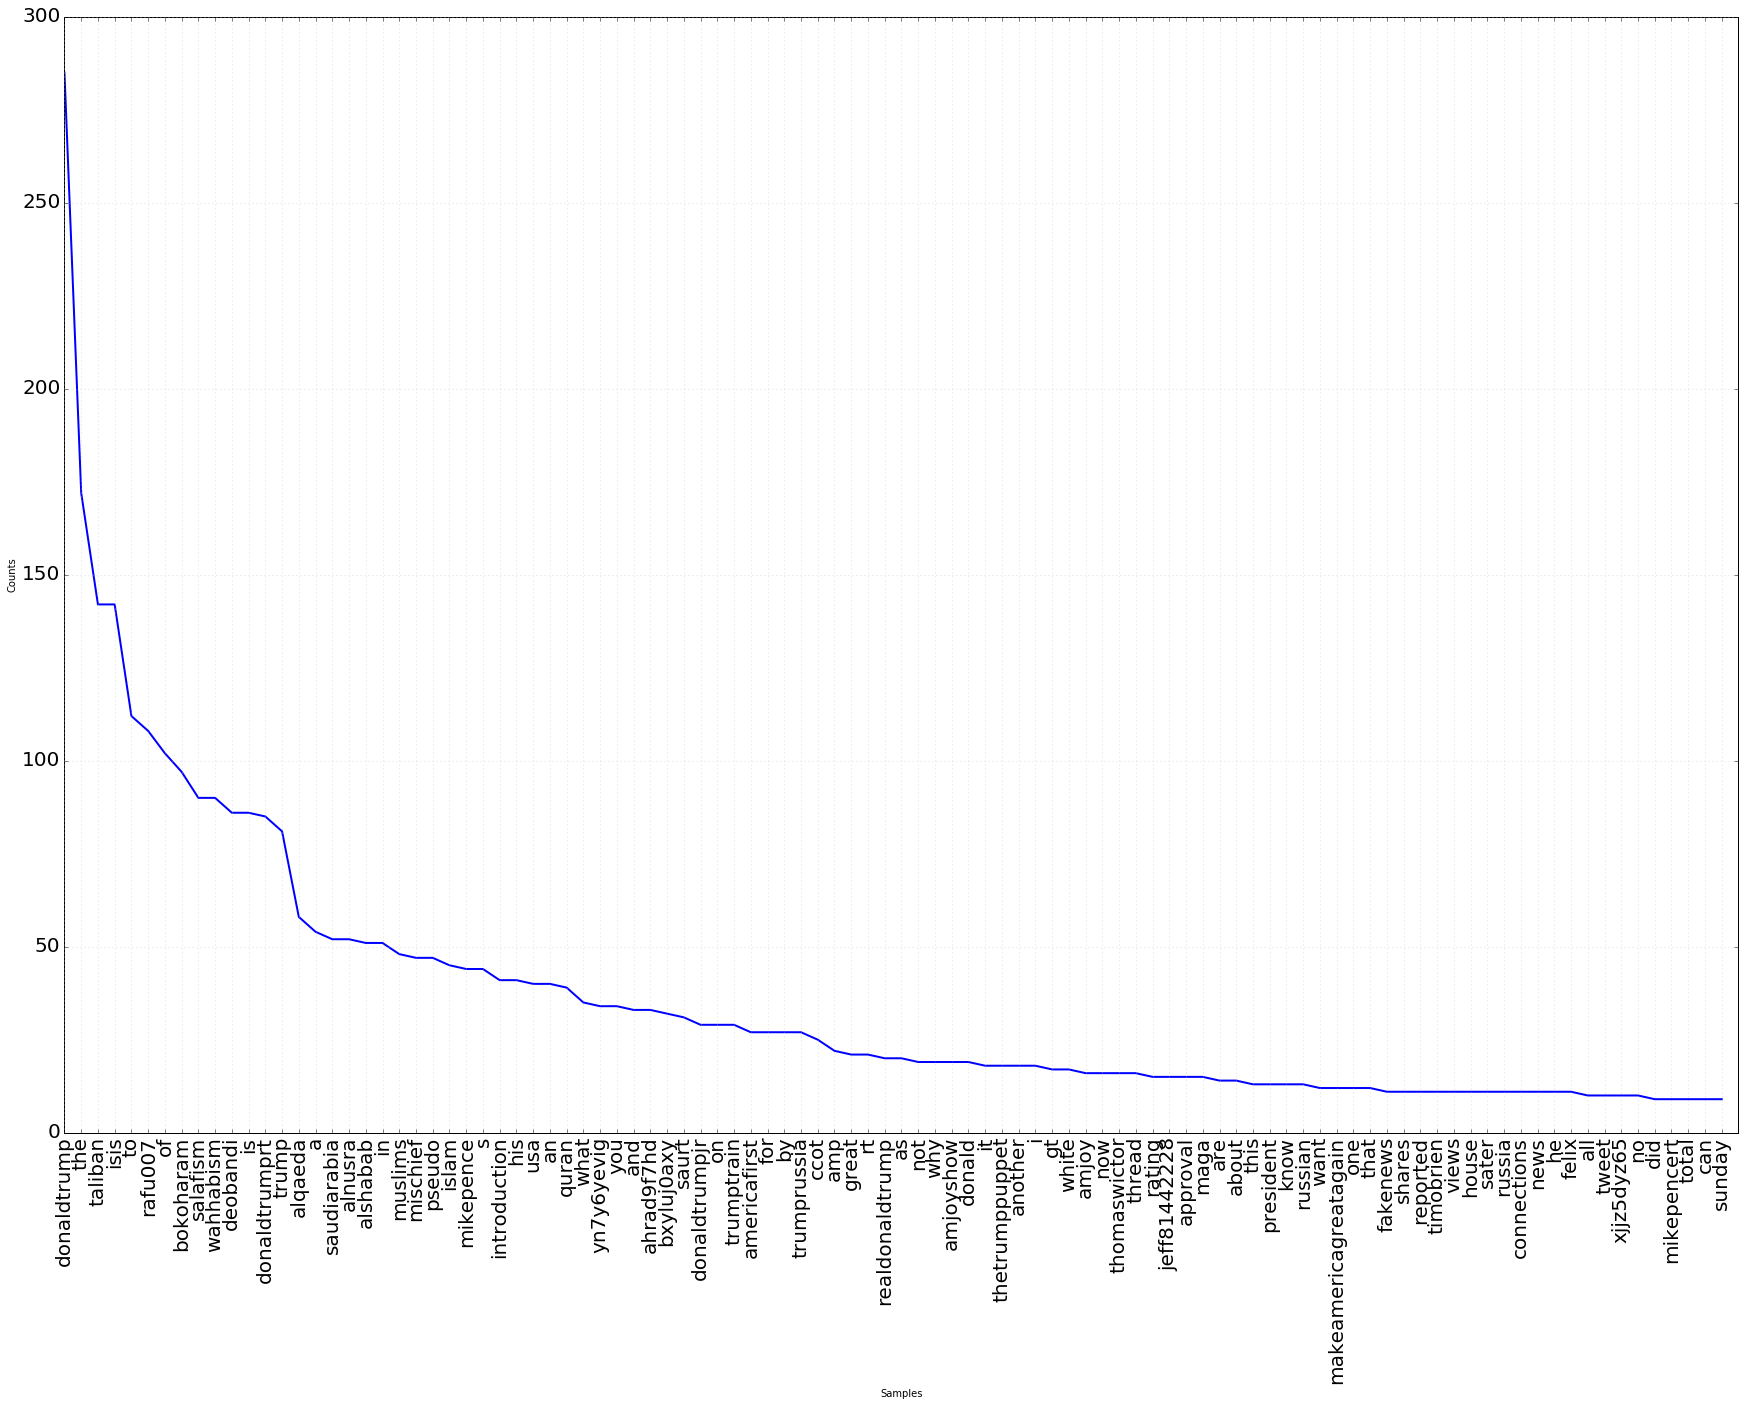

In [45]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

freq_dist.plot(100,cumulative=False)


**Does the observed relative frequency of these words follow Zipf’s law? Explain.**

This corpus does <span style="color:red"> not </span> follow Zipf's law.  Whole the first 2 terms have a frequency of 50% less then the each other, after the first two terms the frequency decreases slower than 50% with each term.

**In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**

This corpus differs signifigantly from "all words in all corpora" , becasue political discourse on twitter follows a controlled vocab